In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1次元入力2クラス分類

## 確率で表すクラス分類

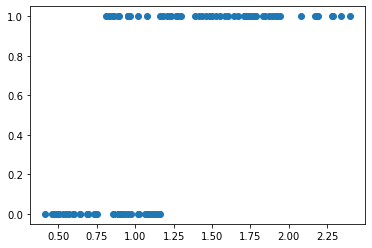

In [49]:
np.random.seed(seed=0)
X_min, X_max = 0, 2.5
N = 100
col = ["cornflowerblue", "gray"]
X = np.zeros(N)
T = np.zeros(N, dtype=np.uint8)

prm_s = [0.4, 0.8] # クラス0,1の分布の開始地点
prm_w = [0.8, 1.6] # クラス0,1の分布の幅
prm_pi = 0.5 # クラス0,1の全体に対する比率

for n in range(N):
    r = np.random.rand()
    T[n] = 0*(r<prm_pi) + 1*(r>=prm_pi) # r<0.5でクラス0(メス), r>=0.5でクラス1(オス)のラベルを付ける
    X[n] = prm_s[T[n]] + np.random.rand() * prm_w[T[n]] # 体重を生成

plt.plot(X, T, "o")

In [50]:
def show_data1d(x, t):
    for k in range(2):
        plt.plot(x[t==k], t[t==k], col[k], alpha=0.5, linestyle="none", marker="o")
        plt.xticks(np.arange(0, 3, 0.5))
        plt.yticks([0,1])
        plt.xlim(X_min, X_max)
        plt.ylim(-0.5, 1.5)

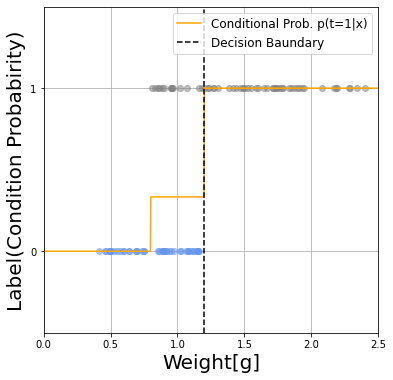

In [65]:
fig = plt.figure(figsize=(6,6))
show_data1d(X, T)
w = np.linspace(.0, 2.5, 1000)
l = []
for i in w:
    if i<0.8:
        l.append(0)
    elif 0.8<=i and i<1.2:
        l.append(1/3)
    else:
        l.append(1)

plt.plot(w, l, c="orange", label="Conditional Prob. p(t=1|x)")
plt.plot([1.2,1.2], [-0.5, 1.5], c="black",linestyle="dashed", label="Decision Baundary")
plt.xlabel("Weight[g]",fontsize=20)
plt.ylabel("Label(Condition Probabirity)", fontsize=20)
plt.grid()
plt.legend(fontsize=12)
plt.show()

p(t=1|x)=0.5となるxを決定境界  
これはデータの真の分布が一様分布であると仮定したときの境界  
ただのラベルだったものを条件付き確率ととらえ直す  
0.8 < x <= 1.2での条件付確率p(t=1|x)が一定だとするのは実際の問題を考えるときにはいくらか無理がある

## 最尤推定

0.8 < x <= 1.2 の範囲にあるtに着目  

0.8 < x <= 1.2について  
p(t=1|x) = w  
という単純なモデルを考える(0<w<=1)。

このモデルがT=0, 0, 0, 1というデータを生成したとする  
この情報から最も妥当なwを推定する(最尤推定)  

「クラスデータT=0, 0, 0, 1がモデルから生成された確率」 = <font color="red">**尤度**</font> L(Likelyhood) 

<strong> L = (1-w)**3 * w </strong>

尤度Lを最大にするwの値が最も妥当だと考えられる。



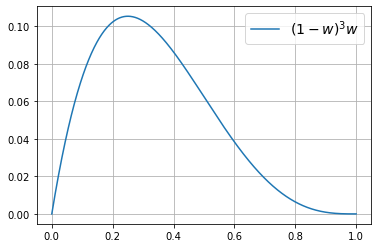

In [64]:
x = np.linspace(0, 1.0, 1000)
plt.plot(x, (1-x)**3*x, label="$(1-w)^3  w$")
plt.grid()
plt.legend(fontsize=14)

## ロジスティック回帰モデル

質量のデータを一様分布から生成していたのが、ガウス分布で考えることにする  
このときp(t=1|x)はロジスティック回帰モデルで表せる

$$
\mathrm{Logistic\ Regression\ Model} \\
y = w_0 + w_1 \\
y = \sigma(w_0+w_1) = \frac{1}{1+\exp\{-(w_0x+w_1)\}}
$$

In [68]:
def LogReg(x):
    return 1 / ( 1 + np.exp(-x) )

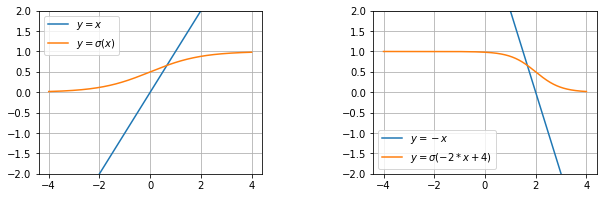

In [101]:
x = np.linspace(-4, 4, 1000)

plt.figure(figsize=(10,3)) # 全体のサイズ
plt.subplots_adjust(wspace=0.5, hspace=1) #グラフの間隔
ax = plt.subplot(1, 2, 1)

ax.plot(x, x, label="$y=x$")
ax.plot(x, LogReg(x), label="$y=\sigma (x)$")
ax.grid()
ax.set_ylim(-2, 2)
ax.legend()

ax = plt.subplot(1, 2, 2)
ax.plot(x, -2*x+4, label="$y=-x$")
ax.plot(x, LogReg(-2*x+4), label="$y=\sigma (-2*x+4)$")
ax.grid()
ax.set_ylim(-2, 2)
ax.legend()

Decision Boundary = 1.25


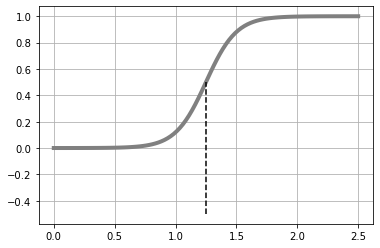

In [104]:
def logistic(x, w):
    return  1 / ( 1 + np.exp( -( w[0]*x+w[1] ) ) )

def show_logistic(w):
    x = np.linspace(X_min, X_max, 100)
    y = logistic(x, w)
    plt.plot(x, y, "gray", linewidth=4)
    
    # Decision Boundary
    i = np.min(np.where(y>0.5))
    boundary = (x[i-1]+x[i])/2
    plt.plot([boundary, boundary], [-0.5, 0.5], "black", linestyle="--")
    return boundary

w = np.array([8, -10])
b = show_logistic(w)
print(f"Decision Boundary = {b}")
plt.grid()
plt.show()

In [108]:
a = np.arange(10, 20, 1)
a = np.where(a<15)
a

(array([0, 1, 2, 3, 4], dtype=int64),)


test
```python
def f(x):
    """a docstring"""
    return x**2
```   
